# Machine Learning Assingment 1
## Linear Regression:

### We will import the important libraries we are going to use.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix
from sklearn import metrics

### Read the data to start working...

In [2]:
df= pd.read_csv("used_cars.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'used_cars.csv'

### The 'df.head()' shows the first 5 rows in the dataset.

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### The 'df.tail()' shows the last 5 rows in the dataset.

In [ ]:
df.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"
4008,BMW,X3 xDrive30i,2020,"43,000 mi.",Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000"


### We will check the null values.

In [ ]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

### We will drop all the null values in the 'used_cars' dataset.

In [ ]:
df.dropna(inplace = True)

### Check the null values again, it will be all zeroes.

In [ ]:
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

### 'df.dtypes' give us the data types of all columns of the dataset.

In [ ]:
print(df.dtypes)

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object


### Here we will change the data type of the columns 'milage' & 'price' into float.
This code cleans the milage and price columns by removing commas, units like "mi.", and symbols like "$", then converts the resulting strings into numeric float values. This makes the data suitable for analysis and modeling.

In [ ]:
df['milage'] = (
    df['milage']
    .str.replace(',', '', regex=False)
    .str.replace(' mi.', '', regex=False)
    .astype(float)
)
df['price'] = (
    df['price']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

### Check the data types again to make sure that the two columns data types are changed.

In [ ]:
print(df.dtypes)

brand            object
model            object
model_year        int64
milage          float64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title      object
price           float64
dtype: object


### Check the duplicate values.

In [ ]:
print(df.duplicated().sum())

0


### Visulization of outliers:
This code creates box plots for the price and milage columns to visually detect outliers. Box plots help identify extreme values by showing the distribution, median, and potential outliers in the data.

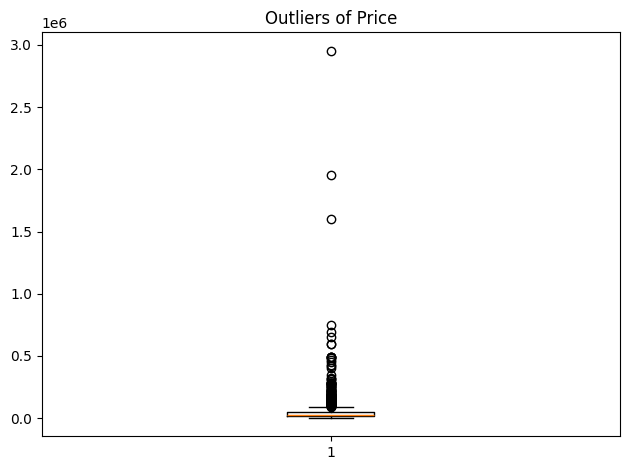

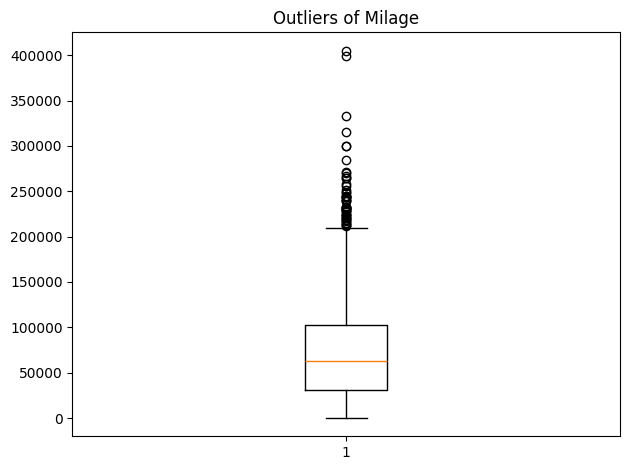

In [ ]:
plt.boxplot(x=df['price'])
plt.title("Outliers of Price")
plt.tight_layout()
plt.show()
# Box plot to check outliers in mileage
plt.boxplot(x=df['milage'])
plt.title("Outliers of Milage")
plt.tight_layout()
plt.show()

### Handling Outliers:
This code removes outliers from the price and milage columns using the Interquartile Range (IQR) method. It calculates the 25th (Q1) and 75th (Q3) percentiles, computes the IQR, and defines lower and upper bounds. Any values outside these bounds are considered outliers and are removed to create a cleaner dataset (df_clean).

In [ ]:
# For 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_price = Q1_price - 1.5 * IQR_price
upper_price = Q3_price + 1.5 * IQR_price

# For 'milage'
Q1_milage = df['milage'].quantile(0.25)
Q3_milage = df['milage'].quantile(0.75)
IQR_milage = Q3_milage - Q1_milage
lower_milage = Q1_milage - 1.5 * IQR_milage
upper_milage = Q3_milage + 1.5 * IQR_milage

# Remove outliers in both columns
df_clean = df[
    (df['price'] >= lower_price) & (df['price'] <= upper_price) &
    (df['milage'] >= lower_milage) & (df['milage'] <= upper_milage)
]

### Checking the outliers after handling:
This code creates a boxplot to visualize the distribution of 'price' and 'milage' values in the df_clean


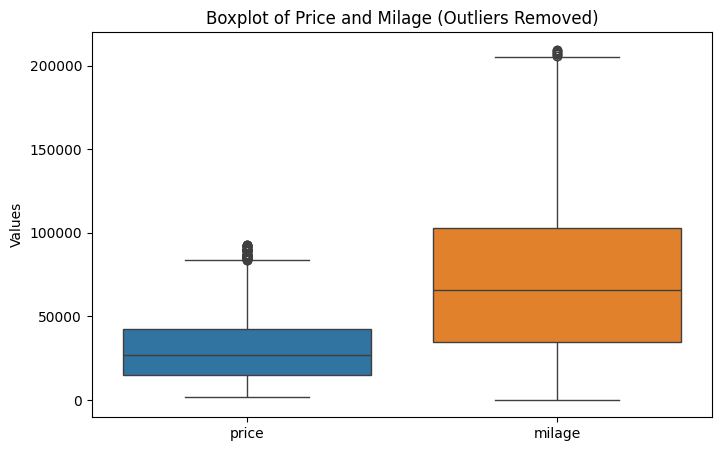

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean[['price', 'milage']])
plt.title("Boxplot of Price and Milage (Outliers Removed)")
plt.ylabel("Values")
plt.show()

### Selecting features and splitting the data:
This code prepares the data for a machine learning model. It defines the features ('milage', 'model_year', 'brand', 'fuel_type', 'transmission') and the target variable ('price'). It then splits the data into input features X and target values y, removing any rows with missing values in X. A ColumnTransformer is used to preprocess the data, scaling numerical features with StandardScaler and applying one-hot encoding to categorical features using OneHotEncoder. Finally, the data is split into training and testing sets, with 80% used for training and 20% for testing, ensuring a random split with a fixed seed (random_state=42) for reproducibility.

In [ ]:
# Select features and target
features = ['milage', 'model_year', 'brand', 'fuel_type', 'transmission']
target = 'price'
X = df_clean[features].dropna()
y = df_clean.loc[X.index, target]
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(),features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), features)
])
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Visualization:
This code creates a figure with three subplots to visualize the distribution of 'price' and 'milage', as well as their relationship. The first subplot shows the price distribution using a histogram with a kernel density estimate (KDE) in blue. The second subplot displays the milage distribution with a similar histogram in brown. The third subplot presents a scatter plot of 'milage' versus 'price', colored purple, to explore their relationship. The tight_layout() function ensures that the subplots do not overlap, and plt.show() displays the final visualization.

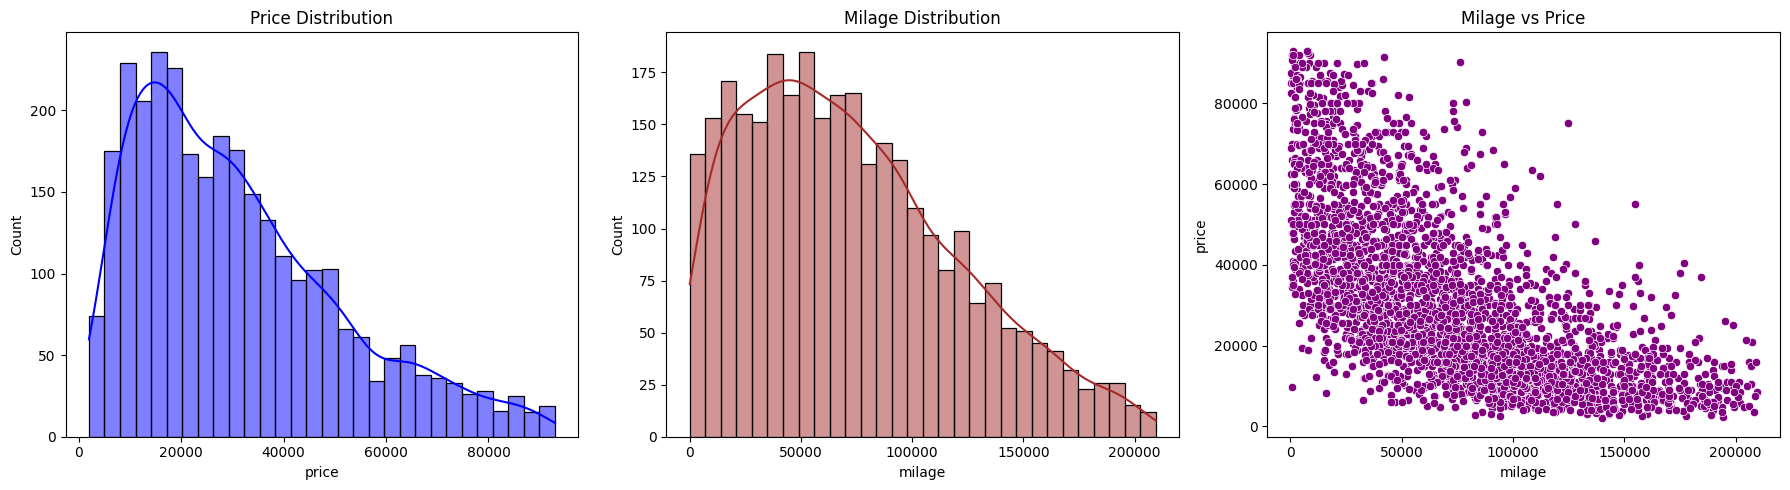

In [ ]:
# 3. EDA - Exploratory Data Analysis
# Plot distributions and scatter plot
plt.figure(figsize=(18, 5))
# Price distribution
plt.subplot(1, 3, 1)
sns.histplot(df_clean['price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')

# Milage distribution
plt.subplot(1, 3, 2)
sns.histplot(df_clean['milage'], kde=True, bins=30, color='brown')
plt.title('Milage Distribution')

# Scatter plot: milage vs price
plt.subplot(1, 3, 3)
sns.scatterplot(x='milage', y='price', data=df_clean, color='purple')
plt.title('Milage vs Price')
plt.tight_layout()
plt.show()



### Corellation:
This code creates a heatmap of the correlation matrix for numerical features in the df_clean DataFrame, highlighting the relationships between variables using color. The correlations are annotated, and the plot is titled "Correlation Matrix."

<function matplotlib.pyplot.show(close=None, block=None)>

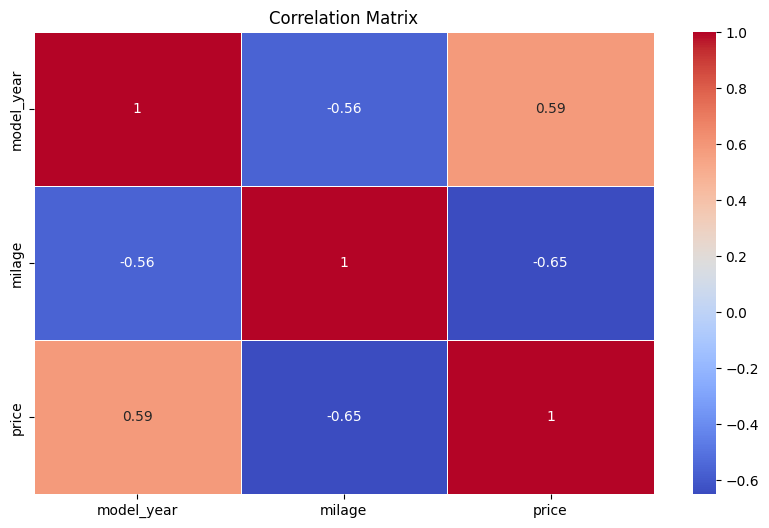

In [ ]:
# Ensure all numeric columns are valid
numeric_df = df_clean.select_dtypes(include='number').copy()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show

### Simple_Linear_Regression:
This code performs a simple linear regression to predict 'price' based on 'milage'. It splits the data into training and testing sets, then trains a linear regression model on the training data. After making predictions on the test set, it calculates and prints the R² score and Mean Squared Error (MSE) to evaluate the model's performance. Finally, it visualizes the results with a scatter plot of actual vs. predicted values, where the actual values are shown in blue and the predicted values are represented by a red line.

[-2046.86470189 34859.25163331 35914.36896437 37929.12646222
 17556.78796105 41499.37736456 37442.27406645 46773.61165211
 39065.11538569 25000.49061889  7149.23610717 26943.03167802
 31797.22053744 32786.88326863 48777.82068138 41697.36400551
 50073.38900125 33385.17076833 24022.72872404 25541.4377253
 30545.19845965 45558.103504   13099.65427774 32533.17907572
 13280.06013773 12733.16261315 44474.58644985 50019.29429061
 34754.03742111 47179.32198193 33385.17076833 32303.2765555
 -2169.65969505 48071.88470751 40390.43579641 24698.91260706
 40525.13162591 49356.63408525 14722.49559699 30950.90878946
 42121.46653694  9260.28218996 33114.69721512 31645.75534765
 31142.94501224 10178.5399031  46733.04061913 22026.90437492
 31800.19574653 21664.19934007 38037.3158835  30372.36585915
 14533.16410974 35548.95919399 31356.61911927 41351.1578574
 39606.06249211 24711.08391695 13911.07493737 12910.3227905
 40316.05556928 40769.63971801 36630.85340682 39876.53604532
 38659.40505588 22097.497972

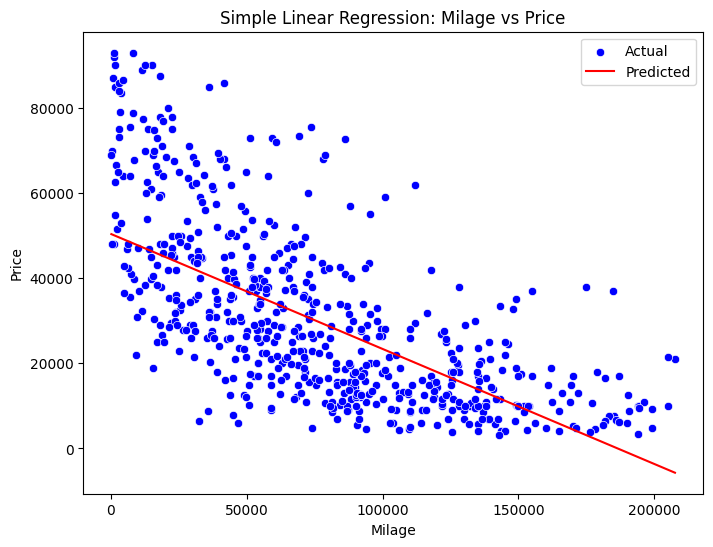

In [ ]:
# 4. Simple Linear Regression (milage -> price)
# Prepare data
X = df_clean[['milage']]
y = df_clean['price']

# Split data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train_s, y_train_s)
y_pred = lin_reg.predict(X_test_s)

# Metrics
print(y_pred)
print("Simple Linear Regression:")
print("R² Score:", r2_score(y_test_s, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test_s, y_pred))

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_s['milage'], y=y_test_s, color='blue', label='Actual')
sns.lineplot(x=X_test_s['milage'], y=y_pred, color='red', label='Predicted')
plt.title('Simple Linear Regression: Milage vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.legend()
plt.show()


### Multiple_Linear_Regression:
This code prepares and trains a linear regression model to predict 'price' based on multiple features, including both numerical and categorical variables. It first calculates the correlation between numerical features ('model_year', 'milage', and 'price') as part of exploratory data analysis (EDA). It then drops rows with missing values and defines the features and target. A preprocessing pipeline is created to scale numerical features and one-hot encode categorical ones. The full pipeline, including preprocessing and the linear regression model, is fitted to the training data, and predictions are made on the test set. The model's performance is evaluated using R² score and mean squared error.

In [ ]:
features = ['milage', 'model_year', 'brand', 'fuel_type', 'transmission']
target = 'price'

# Correlation (optional step, helpful for EDA)
numericdata = df_clean[["model_year", "milage", "price"]]
correlation = numericdata.corr()
print("Correlation matrix:\n", correlation)

# Drop rows with missing values in features/target
df_model = df_clean[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# Define numeric and categorical features
numeric_features = ['milage', 'model_year']
categorical_features = ['brand', 'fuel_type', 'transmission']

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline with regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train_m, y_train_m)
# Make predictions
predictions = pipeline.predict(X_test_m)

# Evaluate
print("R² Score:", r2_score(y_test_m, predictions))
print("Mean Squared Error:", mean_squared_error(y_test_m, predictions))

Correlation matrix:
             model_year    milage     price
model_year    1.000000 -0.563146  0.586756
milage       -0.563146  1.000000 -0.650075
price         0.586756 -0.650075  1.000000
R² Score: 0.6138429620337644
Mean Squared Error: 168873684.10451648


### Comparison between Simple_linear_Regression & Multiple_linear_Regression:
This code evaluates and compares the performance of Simple Linear Regression and Multiple Linear Regression models. It first prints the R² score and Mean Squared Error (MSE) for both models. Then, it generates two plots: the first subplot visualizes the Simple Linear Regression with a scatter plot of actual vs. predicted values and a red line for predictions. The second subplot shows the Multiple Linear Regression, plotting actual prices vs. predicted prices with a green scatter plot and a red dashed line representing perfect predictions. The tight_layout() function ensures the plots are neatly arranged.

Simple Linear Regression:
R² Score: 0.44175783020286297
MSE: 244129725.90799826
Multiple Linear Regression:
R² Score: 0.6138429620337644
MSE: 168873684.10451648


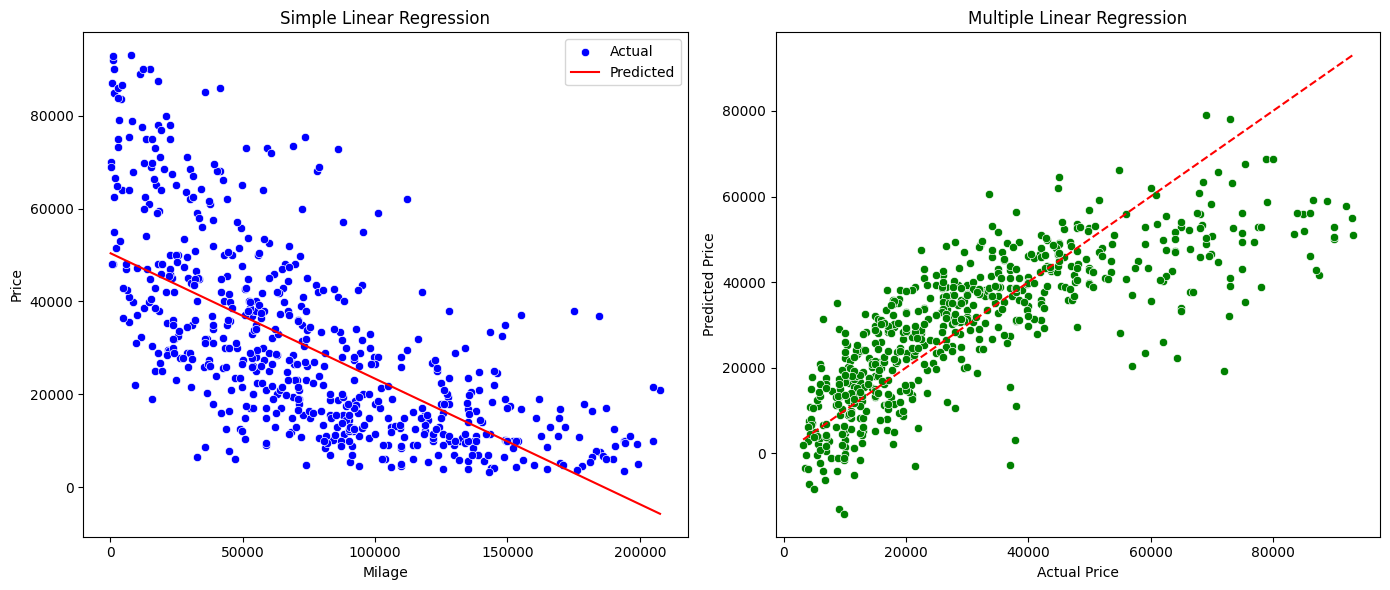

In [ ]:
#METRICS
print("Simple Linear Regression:")
print("R² Score:", r2_score(y_test_s, y_pred))
print("MSE:", mean_squared_error(y_test_s, y_pred))

print("Multiple Linear Regression:")
print("R² Score:", r2_score(y_test_m, predictions))
print("MSE:", mean_squared_error(y_test_m, predictions))

#PLOTS
plt.figure(figsize=(14, 6))

#Simple Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_s['milage'], y=y_test_s, color='blue', label='Actual')
sns.lineplot(x=X_test_s['milage'], y=y_pred, color='red', label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.legend()

#Multiple Linear Regression (Predicted vs Actual)
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_m, y=predictions, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

### Polynomial_linear_Regression:
This code performs Polynomial Regression with degrees 2, 3, and 4 to predict 'price' based on 'milage'. It splits the data into training and testing sets, then for each degree, it creates a pipeline that applies Polynomial Features, scales the data, and fits a Linear Regression model. The model is trained on the training data and tested on the test data, with the R² score and Mean Squared Error (MSE) computed for each degree. The results are stored in a list and plotted, showing the actual vs. predicted values for each polynomial degree. Finally, the R² and MSE values for each degree are printed to compare the models' performance.

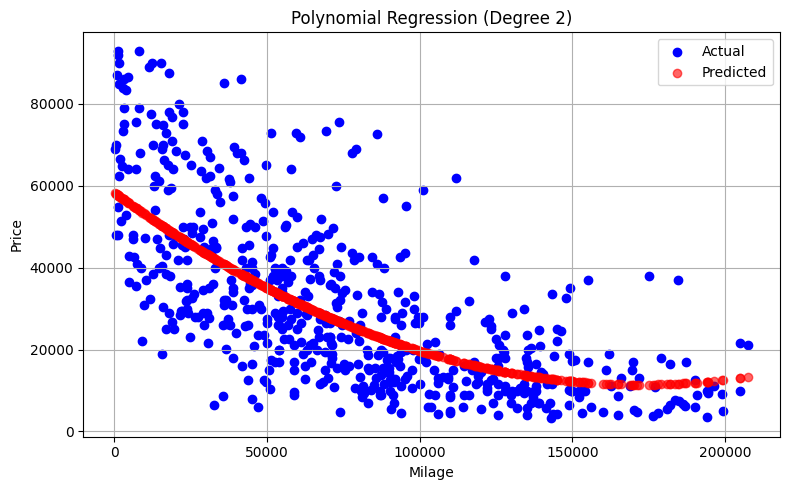

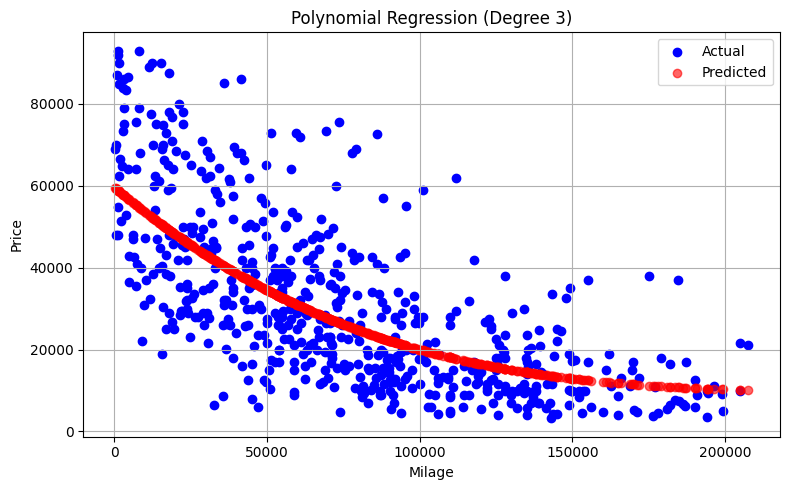

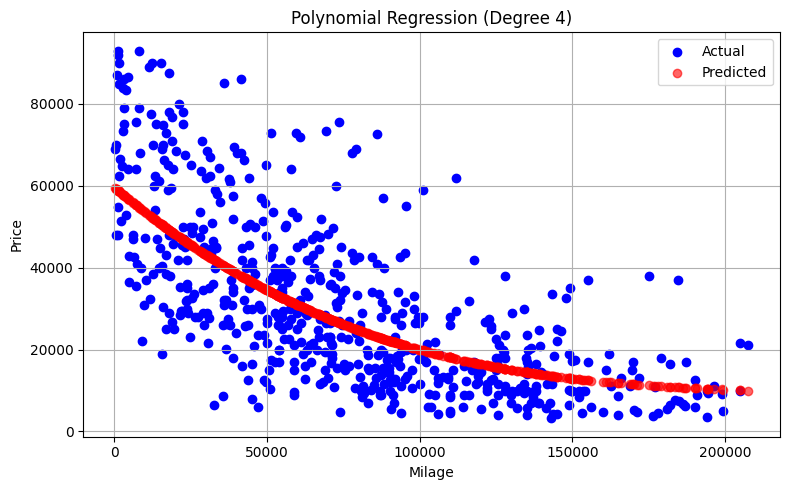

Degree 2: R² = 0.5038, MSE = 216997577.53
Degree 3: R² = 0.5062, MSE = 215965799.75
Degree 4: R² = 0.5061, MSE = 215984228.87


In [ ]:
# Feature and target
X = df_clean[['milage']]
y = df_clean['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
results = []

# Try degrees 2, 3, 4
for degree in [2, 3, 4]:
    # Pipeline: Polynomial -> Scale -> Linear Regression
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scale', StandardScaler()),
        ('regressor', LinearRegression())
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append((degree, r2, mse))

# Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Milage')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Show comparison
for degree, r2, mse in results:
    print(f"Degree {degree}: R² = {r2:.4f}, MSE = {mse:.2f}")

## Logistic Regression:

### Read the data to start working...
### Display data..

In [ ]:
data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### We will check the null values.

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Cleaning:
This code removes unnecessary columns and fills missing values in the 'Age' column with the mean and in the 'Embarked' column with the most frequent value.

In [ ]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\Lap-Top\AppData\Local\Temp\ipykernel_6904\753211190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\Lap-Top\AppData\Local\Temp\ipykernel_6904\753211190.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

### Check the null values again, it will be all zeroes.

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 'df.dtypes' give us the data types of all columns of the dataset.

In [ ]:
print(data.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


### Encoding:
This code encodes the 'Sex' column by mapping 'male' to 0 and 'female' to 1. It also converts the 'Embarked' column into dummy variables using one-hot encoding, dropping the first category to avoid multicollinearity.
Then print the first 5 rows in the dataset after encoding.

In [ ]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [ ]:
print(data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


#### We will check duplicated values.

In [ ]:
print(data.duplicated().sum())

111


#### We dropped the duplicated rows.

In [ ]:
data.drop_duplicates(inplace=True)

#### Check the duplicated values again, it will be all zeroes.

In [ ]:
print(data.duplicated().sum())

0


#### We used box plots to visualize outliers in the 'Age' and 'Fare' columns.

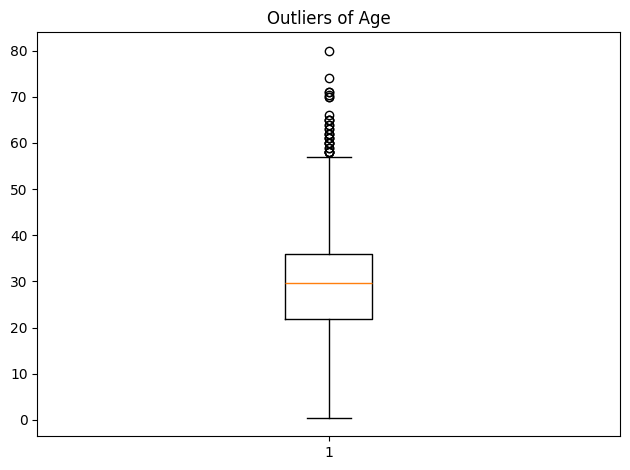

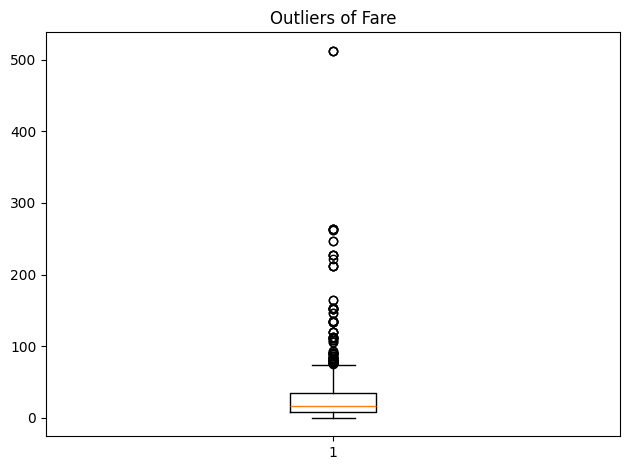

In [ ]:
# Box plot to check outliers in Age
plt.boxplot(x=data['Age'])
plt.title("Outliers of Age")
plt.tight_layout()
plt.show()
# Box plot to check outliers in Fare
plt.boxplot(x=data['Fare'])
plt.title("Outliers of Fare")
plt.tight_layout()
plt.show()

### Handling Outliers
This code removes outliers from the 'Age' and 'Fare' columns using the Interquartile Range (IQR) method, keeping only the values within 1.5 IQRs of the first and third quartiles.

In [ ]:
# For 'Age'
Q1_Age = data['Age'].quantile(0.25)
Q3_Age = data['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_Age = Q1_Age - 1.5 * IQR_Age
upper_Age = Q3_Age + 1.5 * IQR_Age

# For 'Fare'
Q1_Fare = data['Fare'].quantile(0.25)
Q3_Fare = data['Fare'].quantile(0.75)
IQR_Fare = Q3_Fare - Q1_Fare
lower_Fare = Q1_Fare - 0.5 * IQR_Fare
upper_Fare = Q3_Fare + 0.5 * IQR_Fare

# Remove outliers in both columns
data_clean = data[
    (data['Age'] >= lower_Age) & (data['Age'] <= upper_Age) &
    (data['Fare'] >= lower_Fare) & (data['Fare'] <= upper_Fare)
]

#### Finally, We created a boxplot of 'Age' and 'Fare' after outlier removal to see their distributions without extreme values.

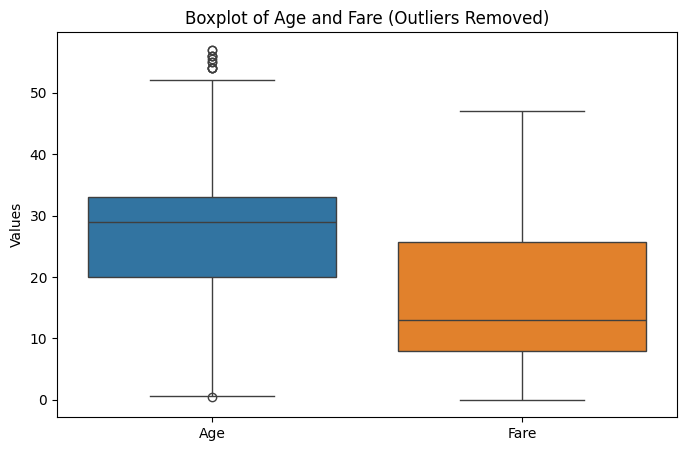

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_clean[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare (Outliers Removed)")
plt.ylabel("Values")
plt.show()

#### This is the final discription of the data.

In [ ]:
data_clean.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,0.348259,2.548922,0.338308,27.356257,0.490879,0.404643,16.164179
std,0.476814,0.668845,0.473527,11.857130,0.973656,0.858093,10.088477
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,1.000000,33.000000,1.000000,0.000000,25.756250
max,1.000000,3.000000,1.000000,57.000000,5.000000,6.000000,47.100000


### Correlation_Matrix:
This code computes the correlation matrix of the data, showing the relationships between numerical variables.

In [ ]:
corr_matrix = data_clean.corr()
corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.235817,0.441100,-0.142659,-0.057552,0.073180,0.138577,0.002365,-0.080425
Pclass,-0.235817,1.000000,0.021084,-0.288235,0.174777,0.107272,-0.487145,0.185617,-0.052122
Sex,0.441100,0.021084,1.000000,-0.115546,0.103982,0.279844,0.128512,0.082629,-0.076321
Age,-0.142659,-0.288235,-0.115546,1.000000,-0.392560,-0.214661,-0.076826,-0.006012,0.032660
SibSp,-0.057552,0.174777,0.103982,-0.392560,1.000000,0.406044,0.500217,0.002940,0.050724
Parch,0.073180,0.107272,0.279844,-0.214661,0.406044,1.000000,0.487760,-0.059955,0.055659
Fare,0.138577,-0.487145,0.128512,-0.076826,0.500217,0.487760,1.000000,-0.124954,0.014027
Embarked_Q,0.002365,0.185617,0.082629,-0.006012,0.002940,-0.059955,-0.124954,1.000000,-0.559933
Embarked_S,-0.080425,-0.052122,-0.076321,0.032660,0.050724,0.055659,0.014027,-0.559933,1.000000


### Correlation_Plot:
This code generates a heatmap of the correlation matrix using sns.heatmap(), with annotations to display the correlation values. The 'coolwarm' color map visually highlights the strength of relationships between numerical variables.

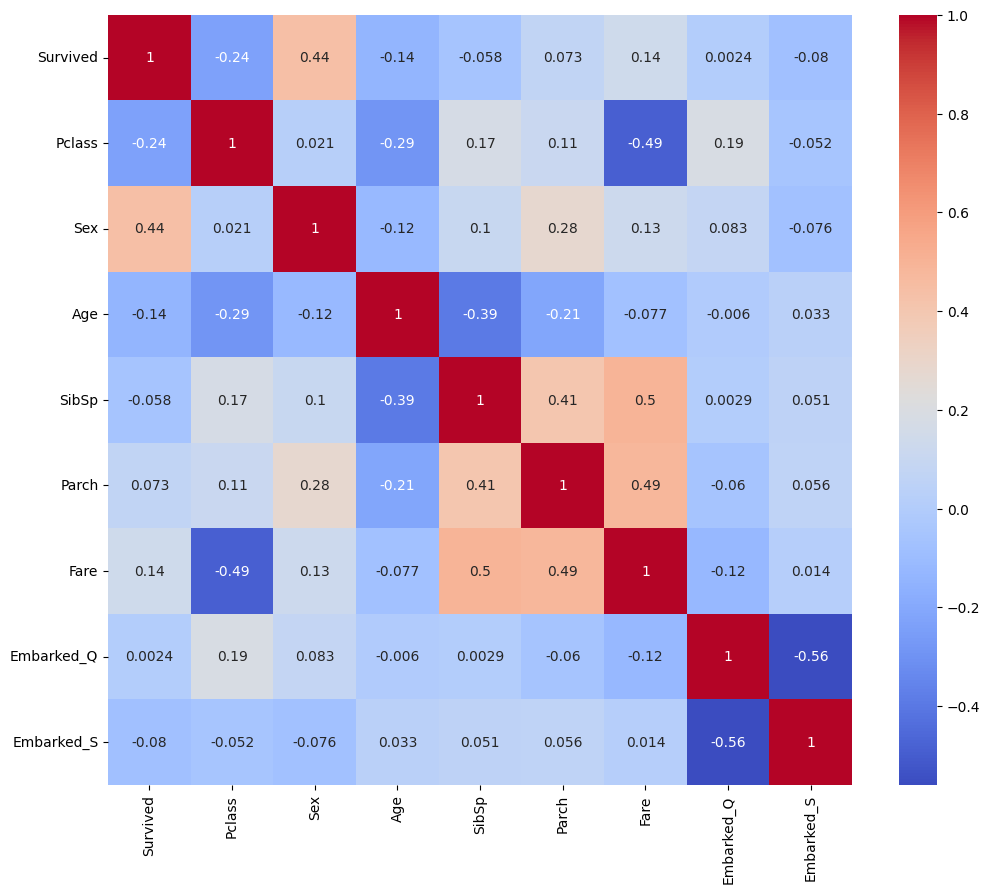

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

 This code separates the features (X) from the target variable (y), with 'Survived' as the target and all other columns as features,
 Then splits the data into training and testing sets, with 80% of the data used for training (x_train, y_train) and 20% for testing (x_test, y_test). The random_state=1 ensures reproducibility of the split.

In [ ]:
X = data_clean.loc[:, data_clean.columns != 'Survived']
y= data_clean['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

 This code trains the logistic regression model (lr_multiple) on the training data (x_train, y_train) by fitting it to the provided features and target. The model learns the relationship between the features and the target variable,
 Then makes predictions on the test data (x_test) using the trained logistic regression model and stores the predicted values in y_pred.

In [ ]:
lr_multiple = LogisticRegression()

In [ ]:
lr_multiple.fit(x_train, y_train)

D:\Programs\Pycharm\PythonProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr_multiple.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

### Confusion_Matrix:
This code generates the confusion matrix to compare the actual and predicted values, showing classification results.
This code creates a heatmap of the confusion matrix using sns.heatmap(). It visualizes the performance of the logistic regression model, with actual values on the y-axis and predicted values on the x-axis. The matrix is annotated with the count of predictions, and the plot is labeled for clarity.


In [ ]:
confusion_matrix(y_test, y_pred)

array([[67,  9],
       [18, 27]])

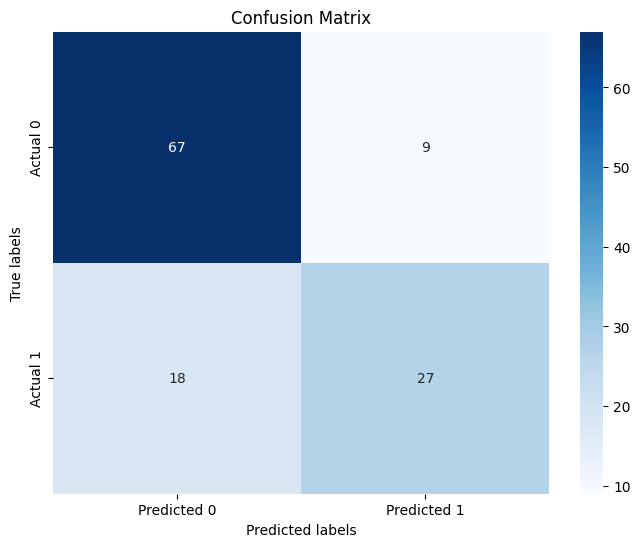

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Accuracy:
This code calculates the accuracy of the logistic regression model by comparing the actual values (y_test) with the predicted values (y_pred). It then prints the accuracy score, which represents the proportion of correct predictions.


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.7768595041322314


### Summary:
#### Used Car Price Prediction:
Data from used_cars.csv was cleaned (handled missing values, converted types, removed outliers in 'price' & 'milage' using IQR).
Features were preprocessed (scaling, one-hot encoding).
Multiple Linear Regression (using several features) achieved the best price prediction performance (R² ≈ 0.61).
This significantly outperformed Simple Linear Regression (using only 'milage', R² ≈ 0.44) and Polynomial Regression (using 'milage', R² ≈ 0.51).
#### Titanic Survival Prediction:
Data from Titanic-Dataset.csv was cleaned (dropped columns, imputed missing 'Age' & 'Embarked').
Categorical features ('Sex', 'Embarked') were encoded.
Logistic Regression achieved a respectable accuracy of about 81.6% for predicting passenger survival.
#### In conclusion:
The notebook demonstrated effective data preparation and modeling for both regression (car price) and classification (Titanic survival), identifying Multiple Linear Regression as the superior model for the car price task in this analysis.


